## Apple Health Processor - Weight

-----

## Dependencies and Libraries

In [1]:
from datetime import date, datetime, timedelta as td
import pytz
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

------

## Functions for Processing Dates and Timezones

In [2]:
# functions to convert UTC to Local time zone and extract date/time elements
convert_tz = lambda x: x.to_pydatetime().replace(tzinfo=pytz.utc).astimezone(pytz.timezone('America/New_York'))
get_year = lambda x: convert_tz(x).year
get_month = lambda x: '{}-{:02}'.format(convert_tz(x).year, convert_tz(x).month) #inefficient
get_date = lambda x: '{}-{:02}-{:02}'.format(convert_tz(x).year, convert_tz(x).month, convert_tz(x).day) #inefficient
get_day = lambda x: convert_tz(x).day
get_hour = lambda x: convert_tz(x).hour
get_minute = lambda x: convert_tz(x).minute
get_day_of_week = lambda x: convert_tz(x).weekday()

---

## Meds

In [11]:
meds = pd.read_csv("Meds.csv", header=1)

In [12]:
meds.head()

,Date,Medicine,Dosage,Location,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,5/28/2021,Ozempic,0.25,Right thigh,NaN,NaN,NaN
1,6/4/2021,Ozempic,0.25,Left thigh,NaN,NaN,NaN
2,6/11/2021,Ozempic,0.25,Right thigh,NaN,NaN,NaN
3,6/18/2021,Ozempic,0.25,Left thigh,NaN,NaN,NaN
4,6/25/2021,Ozempic,0.25,Right thigh,NaN,NaN,NaN


In [13]:
meds.columns

Index(['Date', 'Medicine', 'Dosage', 'Location', 'Unnamed: 4', 'Unnamed: 5',
       'Unnamed: 6'],
      dtype='object')

<AxesSubplot:title={'center':'Ozempic Dosage By Date'}, xlabel='Date'>

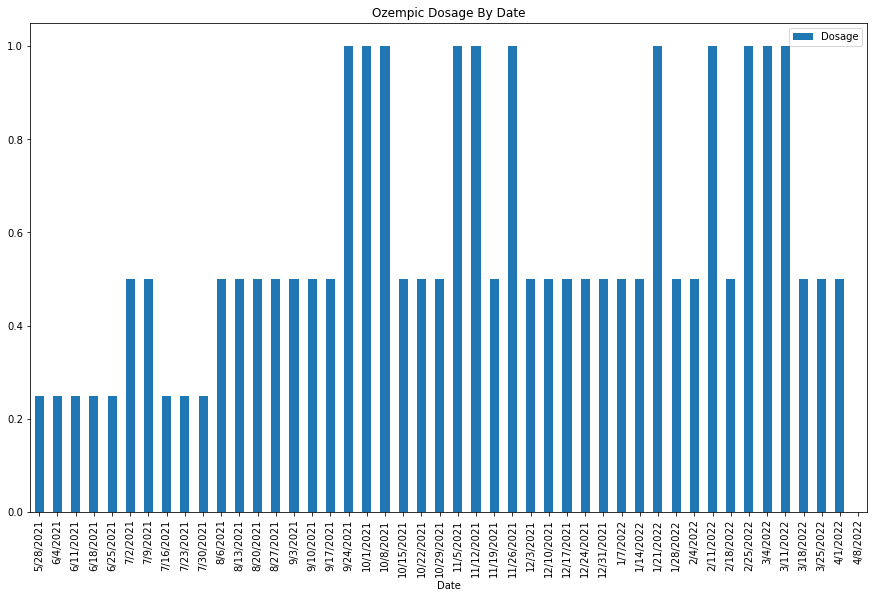

In [19]:
meds.plot(x='Date', y='Dosage', title='Ozempic Dosage By Date', figsize=[15,9], grid=False, kind='bar')

## Rolling Average

<AxesSubplot:title={'center':'Daily weight rolling mean over 7 days'}, xlabel='date'>

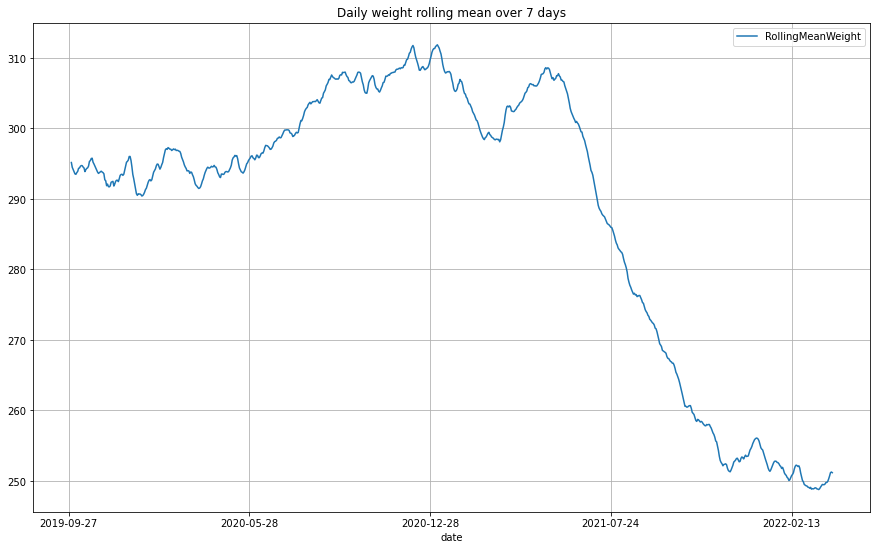

In [13]:
weight_by_date['RollingMeanWeight'] = weight_by_date.Weight.rolling(window=7, center=True).mean()
weight_by_date.plot(x='date', y='RollingMeanWeight', title= 'Daily weight rolling mean over 7 days', figsize=[15, 9], grid=True)
#print (plt.get_xlim())
#left_limit = float("2021-05-13".replace("-", ""))
#plt.set_xlim(1, 0)


------

In [14]:
month_weight = weight.groupby(['month'])['value'].mean().reset_index(name='Weight')

In [15]:
# month_weight

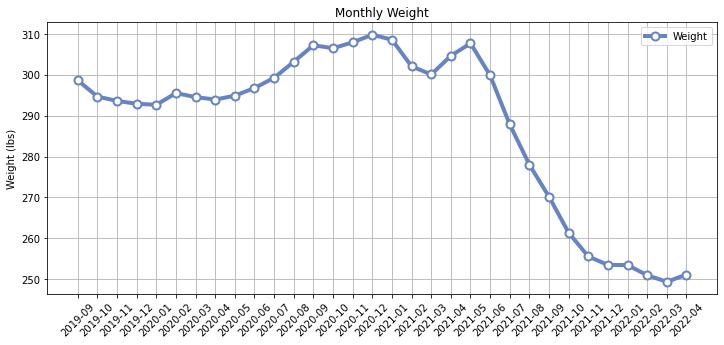

In [22]:
# a bit of a hackish solution, could use improvement
dataset = month_weight
chart_title = 'Monthly Weight'

n_groups = len(dataset)
index = np.arange(n_groups)

ax = dataset.plot(kind='line', figsize=[12, 5], linewidth=4, alpha=1, marker='o', color='#6684c1', 
                      markeredgecolor='#6684c1', markerfacecolor='w', markersize=8, markeredgewidth=2)

# ax.set_xlim((year_counts.index[0], year_counts.index[-1]))

ax.yaxis.grid(True)
ax.xaxis.grid(True)
# ax.set_ylim(0, 1000)
ax.set_xticks(index)
ax.set_xticklabels(dataset.month, rotation=45)
ax.set_ylabel('Weight (lbs)')
#plt.xtickslabels(index, dataset.month, rotation=90)
ax.set_title(chart_title)

plt.show()